{0: 'background', 1: 'butterfly', 2: 'cup', 3: 'airplanes', 4: 'faces'}
image_0008.jpg
/Users/shenzheng/image/image_0008.jpg


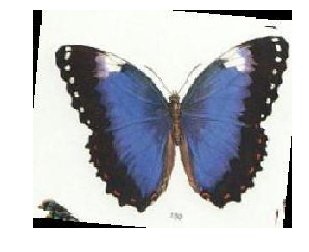

[1 0 2 3 4]
butterfly (score = 0.99955)
background (score = 0.00031)
cup (score = 0.00005)
airplanes (score = 0.00005)
faces (score = 0.00004)

image_0009.jpg
/Users/shenzheng/image/image_0009.jpg


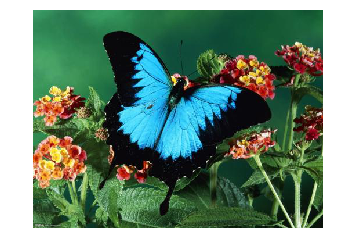

[1 0 3 2 4]
butterfly (score = 0.98716)
background (score = 0.00740)
airplanes (score = 0.00199)
cup (score = 0.00175)
faces (score = 0.00170)

image_0013.jpg
/Users/shenzheng/image/image_0013.jpg


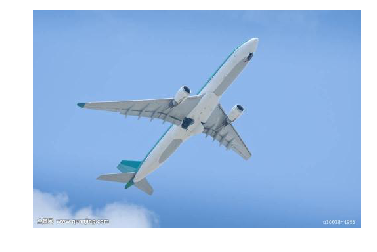

[3 0 1 2 4]
airplanes (score = 0.99806)
background (score = 0.00116)
butterfly (score = 0.00031)
cup (score = 0.00028)
faces (score = 0.00020)

image_0012.jpg
/Users/shenzheng/image/image_0012.jpg


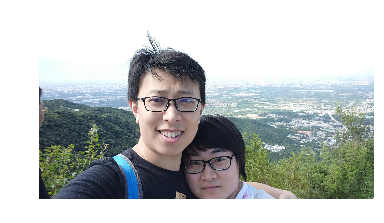

[0 4 1 3 2]
background (score = 0.84782)
faces (score = 0.12924)
butterfly (score = 0.00906)
airplanes (score = 0.00853)
cup (score = 0.00535)

image_0010.jpg
/Users/shenzheng/image/image_0010.jpg


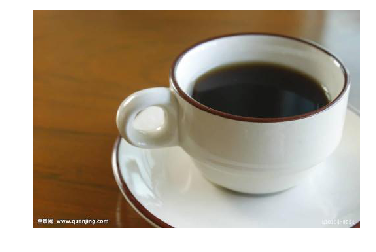

[2 0 3 1 4]
cup (score = 0.99554)
background (score = 0.00212)
airplanes (score = 0.00098)
butterfly (score = 0.00075)
faces (score = 0.00061)

image_0011.jpg
/Users/shenzheng/image/image_0011.jpg


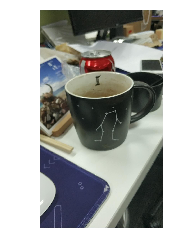

[2 0 4 3 1]
cup (score = 0.57890)
background (score = 0.40098)
faces (score = 0.01111)
airplanes (score = 0.00511)
butterfly (score = 0.00390)

image_0015.jpg
/Users/shenzheng/image/image_0015.jpg


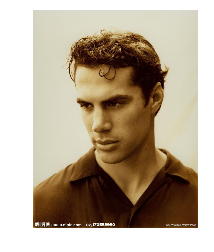

[4 0 2 3 1]
faces (score = 0.94118)
background (score = 0.05386)
cup (score = 0.00272)
airplanes (score = 0.00174)
butterfly (score = 0.00049)

image_0014.jpg
/Users/shenzheng/image/image_0014.jpg


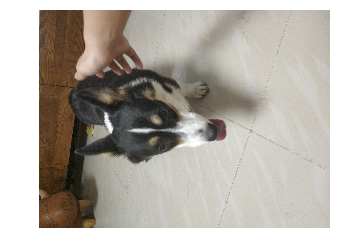

[0 1 4 2 3]
background (score = 0.62882)
butterfly (score = 0.21331)
faces (score = 0.07608)
cup (score = 0.05000)
airplanes (score = 0.03179)

image_0016.jpg
/Users/shenzheng/image/image_0016.jpg


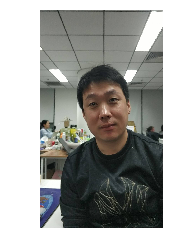

[4 0 3 2 1]
faces (score = 0.84783)
background (score = 0.13985)
airplanes (score = 0.00687)
cup (score = 0.00280)
butterfly (score = 0.00264)



In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import tensorflow as tf
import os
import numpy as np
# import re
from PIL import Image
import matplotlib.pyplot as plt

lines = tf.gfile.GFile(
    '/Users/shenzheng/retrain/output_labels.txt').readlines()
uid_to_human = {}

for uid, line in enumerate(lines):
    line = line.strip('\n')
    uid_to_human[uid] = line
print(uid_to_human)


def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


with tf.gfile.FastGFile('/Users/shenzheng/retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    # 遍历图片
    for (root, dirs, files) in os.walk('/Users/shenzheng/image/'):
        for file in files:
            if not file.endswith(('.jpeg', '.gif', '.jpg', '.png')):
                continue
            # 载入图片
            image_data = tf.gfile.FastGFile(
                os.path.join(root, file), 'rb').read()
            print(file)
            predictions = sess.run(
                softmax_tensor, {'DecodeJpeg/contents:0': image_data})  # 图片格式是jpg

            predictions = np.squeeze(predictions)  # 结果转为1维数据

            # 打印图片路径及名称
            image_path = os.path.join(root, file)
            print(image_path)

            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            # 排序
            top_k = predictions.argsort()[-5:][::-1]
            print(top_k)
            for node_id in top_k:
                # 获取分类名称
                human_string = id_to_string(node_id)
                score = predictions[node_id]
                # 输出置信度
                print('%s (score = %.5f)' % (human_string, score))
            print()
